# Neural Network Implementation: MNIST Example

This notebook demonstrates the usage of our custom neural network implementation on the MNIST digit classification dataset. We'll build and train a simple multilayer perceptron (MLP) to classify handwritten digits.

To run this notebook:

1. Ensure all dependencies are installed.
2. Import the custom neural network modules.
3. Run all cells in order.

You can modify the model configurations and hyperparameters to experiment with different architectures.

## Import Dependencies

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

from basic_neural_net import Sequential
from basic_neural_net import layers, activations, losses, optimizers

## Load and Visualize Dataset

The MNIST dataset consists of $70000$ grayscale images of handwritten digits ($0$-$9$), split into $60000$ training images and $10000$ test images. Each image is $28\times 28$ pixels, which we'll flatten into a $784$-dimensional vector.

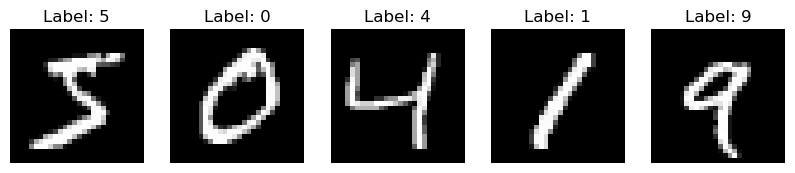

In [2]:
# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# visualize some examples
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.show()

## Preprocess Data

We perform three main preprocessing steps:
1. Reshape images from $28\times 28$ to $784$-dimensional vectors.
2. Normalize pixel values to $[0,1]$ by dividing by $255$.
3. Convert labels to one-hot encoded vectors.

In [3]:
# preprocess the MNIST dataset
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0

# convert labels to one-hot encoded vectors
def one_hot_encode(labels, num_classes):
    num_samples = labels.shape[0]
    encoded_labels = np.zeros((num_samples, num_classes))
    for i in range(num_samples):
        encoded_labels[i, labels[i]] = 1
    return encoded_labels

num_classes = 10
y_train_one_hot = one_hot_encode(y_train, num_classes)
y_test_one_hot = one_hot_encode(y_test, num_classes)

## Define Model Configurations

We implement two simple MLPs with the following configurations:

#### Simple MLP with RMSprop

Input layer: 784 neurons (one per pixel)<br>
Hidden layer: 128 neurons with Sigmoid activation<br>
Output layer: 10 neurons with Softmax activation (one per digit)<br>
Optimizer: RMSprop

#### Wide MLP with Adam

Input layer: 784 neurons (one per pixel)<br>
Hidden layer: 256 neurons with Sigmoid activation<br>
Output layer: 10 neurons with Softmax activation (one per digit)<br>
Optimizer: Adam

We use cross-entropy loss for both neural networks, which is suitable for classification tasks.

In [4]:
# model configurations to try
configurations = [
    {
        'name': 'Simple MLP with RMSprop',
        'hidden_units': 128,
        'activation': activations.Sigmoid,
        'optimizer': optimizers.RMSprop
    },
    {
        'name': 'Wide MLP with Adam',
        'hidden_units': 256,
        'activation': activations.Sigmoid,
        'optimizer': optimizers.Adam
    }
]

## Execute Training Loop

The models are trained with these hyperparameters:

Epochs: 25<br>
Learning rate: 0.001<br>
Batch size: 128<br>
Optimizer: RMSprop/Adam<br>
Loss function: Cross-Entropy

Please note that the subsequent cell may take a minute or two to run.

In [5]:
# training parameters
epochs = 25
learning_rate = 0.001
batch_size = 128
input_size = 784

# dictionary to store results
results = {}

# training loop
for config in configurations:
    print(f"\nTraining {config['name']}...")
    
    # create the model
    model = Sequential()
    model.add(layers.InputLayer(input_shape=input_size))
    model.add(layers.Dense(input_size, config['hidden_units'], 
                          activation=config['activation'], 
                          optimizer=config['optimizer']))
    model.add(layers.Dense(config['hidden_units'], num_classes, 
                          activation=activations.Softmax, 
                          optimizer=config['optimizer']))
    
    # train the model
    train_losses = model.train(X_train.T, 
                               y_train_one_hot.T, 
                               epochs, 
                               learning_rate, 
                               batch_size, 
                               loss=losses.CrossEntropy)
    
    # make predictions
    predictions = model.predict(X_test.T)

    # convert predictions to class labels
    predicted_labels = np.argmax(predictions, axis=0)

    # calculate test accuracy
    accuracy = np.mean(predicted_labels == y_test)
    print(f"Test accuracy: {accuracy:.4f}")
    
    # store results
    results[config['name']] = {
        'accuracy': accuracy,
        'losses': train_losses
    }


Training Simple MLP with RMSprop...
Test accuracy: 0.9750

Training Wide MLP with Adam...
Test accuracy: 0.9771


## Visualize Results

We visualize the training loss over time for each model configuration, as well as the predictions of the Wide MLP with Adam on some example test data (correct in green, incorrect in red).

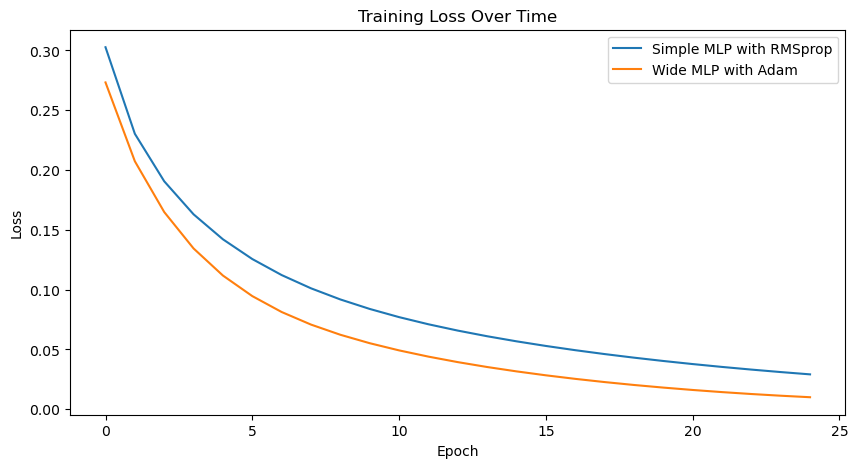

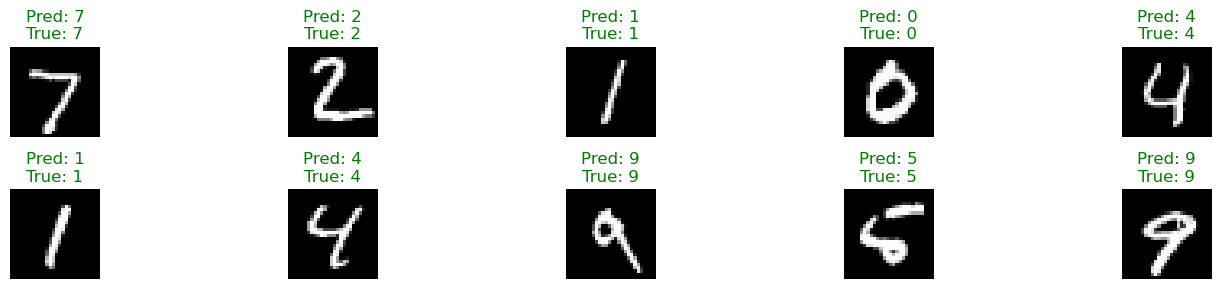

In [6]:
# visualize training progress
plt.figure(figsize=(10, 5))
for name, result in results.items():
    plt.plot(result['losses'], label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# visualize some predictions
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    pred = predicted_labels[i]
    true = y_test[i]
    color = 'green' if pred == true else 'red'
    plt.title(f'Pred: {pred}\nTrue: {true}', color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Model Evaluation

We compare the final accuracies of the two model configurations. While the two configurations performed comparably,  the Wide MLP with Adam achieved a slightly higher test accuracy.

In [7]:
# print final results
print("Final Results:")
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.4f} accuracy")

Final Results:
Simple MLP with RMSprop: 0.9750 accuracy
Wide MLP with Adam: 0.9771 accuracy
